Задачи
1. Импортируйте библиотеку pandas. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
Сколько уникальных значений принимает переменная platform?

2. Какой клиент совершил больше всего успешных операций? (success == True)
Если несколько пользователей совершили одинаковое число успешных действий, 
перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.

3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

6. Постройте график распределения числа успешных операций.
    Выберите верные утверждения:
   1. Несколько клиентов совершили более 40 успешных действий
   2. Бóльшая часть наблюдений сосредоточена в правой части графика
   3. Бóльшая часть наблюдений сосредоточена в левой части графика
   4. Все клиенты совершили не более 5 успешных операций

7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста. 
Клиенты какого возраста совершили наибольшее количество успешных действий?

In [4]:
#Загружаем библиотеки

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Сохраняем пути файлов в переменную

path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/3/logs.csv'
path2 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/3/user_data.csv'

In [6]:
#Считываем и записываем датасеты

logs = pd.read_csv(path, sep=',')
user_data = pd.read_csv(path2, sep=',')

In [7]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [8]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [9]:
#Узнаем размер таблицы 'logs'

logs.shape

(4500, 4)

In [10]:
#Посмотрим на типы данных

logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
#Проверим данные на наличие пустых значений

logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [12]:
#И посмотрим на описательную статистику 

logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [13]:
#Проделаем то же самое с датасетом 'user_data'

user_data.shape

(2954, 3)

In [14]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [15]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [16]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [17]:
#Далее, узнаем сколько уникальных значений принимает переменная platform?
# можно посмотреть распределение поля platform 
# logs.platform.value_counts()

logs.platform.nunique()

3

In [18]:
#Далее, узнаем какой клиент совершил больше всего успешных операций?

In [19]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [64]:
#Отфильтруем колонку success по успешныем операциям, сгрупируем данные по клиентам и посчитаем количество операций

successful_operations = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'platform': 'count'}) \
    .rename(columns={'platform': 'success_operation'}) \
    .sort_values('success_operation', ascending=False)

In [44]:
successful_operations

,client,success_operation
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [65]:
#Узнаем максимальное значение успешных операций и сохраним ее в переменную

max_success = successful_operations.success_operation.max()

In [36]:
max_success

41

In [43]:
#Выведем список ID клиентов

successful_operations.query('success_operation == @max_success') \
    .sort_values('client') \
    .client.tolist()
#Ответ: 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [21]:
# Теперь нас просят узнать, с какой платформы осуществляется наибольшее количество успешных операций?

In [48]:
logs.query('success == True').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [49]:
logs.query('success == True').platform.value_counts().idxmax()
#Ответ: phone  

'phone'

In [50]:
# Также, посмотрим, какую платформу предпочитают премиумные клиенты?

In [54]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [ ]:
# Необхожимо соединить два датафрейма 
# (в нашем случае необязательно указывать тип соединения и колонку по которой будем джоинить)
df = user_data.merge(logs)

In [59]:
df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [69]:
#Теперь, отфильтруем и сгупируем данные по премиум клиентам, посчитаем количество операций

df.query('premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'time' : 'count'}) \
    .rename(columns={'time': 'count'}) \
    .sort_values('count', ascending=False)
#Ответ: phone

,platform,count
1,phone,246
0,computer,150
2,tablet,24


In [68]:
# Более оптимальный вариант
df.query('premium == True').platform.value_counts().idxmax()

'phone'

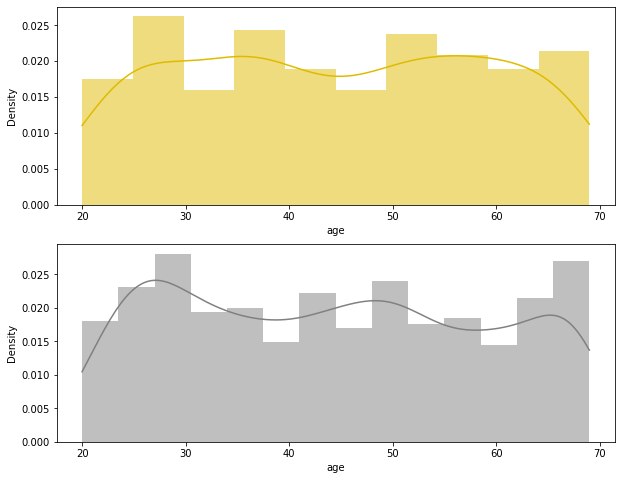

In [107]:
# Визуализируем распределение возраста клиентов в зависимости от типа клиента

fig, ax = plt.subplots(figsize=(10, 8), nrows=2, ncols=1)

sns.histplot(df.query('premium == True').age, ax=ax[0], color='#dfbb00', kde=True, stat='density', linewidth=0)
sns.histplot(df.query('premium == False').age, ax=ax[1], color='#808080', kde=True, stat='density', linewidth=0)

In [ ]:
#Построим график распределения числа успешных операций

In [163]:
#Сначала сгрупируем данные по клиентам и посчитаем кол-во успешных операций

success_number = df.groupby('client', as_index=False) \
    .agg({'success': 'sum'}) 

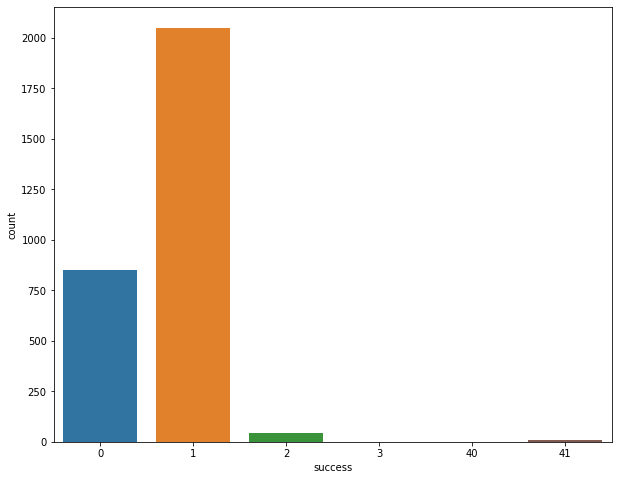

In [180]:
#Воспользуемся графиком countplot и выберем верные утверждения:
#   1) Несколько клиентов совершили более 40 успешных действий
#   2) Бóльшая часть наблюдений сосредоточена в правой части графика
#   3) Бóльшая часть наблюдений сосредоточена в левой части графика
#   4) Все клиенты совершили не более 5 успешных операций

plt.figure(figsize=(10, 8))

sns.countplot(x='success', data=success_number)

#Ответ: 1, 3

In [196]:
# Теперь посторим график (countplot) числа успешных операций, сделанных на платформе computer, в зависимости от возраста. 

In [189]:
computer_successful_operations = df.query('success == True and platform == "computer"')                              

In [191]:
computer_successful_operations.head()

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108


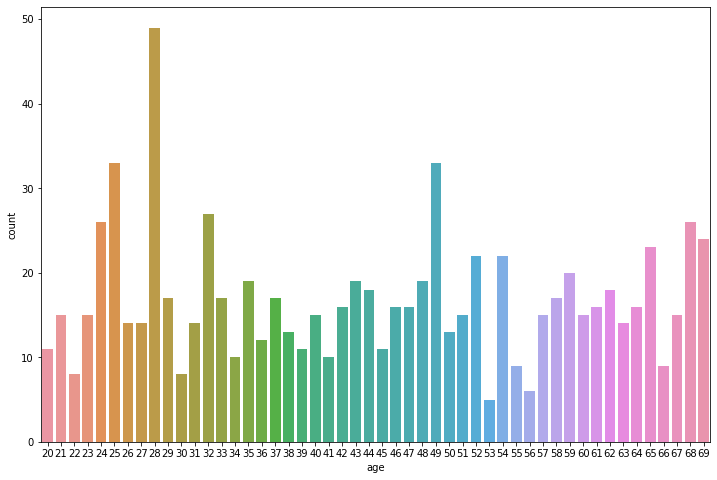

In [197]:
plt.figure(figsize=(12, 8))

sns.countplot(x='age', data=computer_successful_operations)

# И ответим на вопрос по заданию: Клиенты какого возраста совершили наибольшее количество успешных действий?
# Ответ: 28